In [4]:
import os
import numpy as np
import pandas as pd

# getting data
from pydob.exploratory import get_dataset_type_df, convert_float_indices_to_int, savefig,get_dataset_type_df

# plotting 
import matplotlib.pyplot as plt
from pydob.settings import nt_style, nt_blue, nt_black

In [5]:
%matplotlib inline
plt.style.use(nt_style)

# DoB NOW 

In [6]:
permits_now_types = get_dataset_type_df(type_col = 'work_type',
                                        index_col = 'job_filing_number',
                                        year_col = 'issued_date_year',
                                        dataset_name = 'permits_now')

In [7]:
permits_now_types.index.get_level_values(1).unique()

Index(['Plumbing', 'Sprinklers', 'Antenna', 'Construction Fence', 'Curb Cut',
       'Sidewalk Shed', 'Sign', 'Supported Scaffold', 'Standpipe',
       'Boiler Equipment', 'Mechanical Systems', 'Structural'],
      dtype='object', name='work_type')

# 1.0 Permits Categorical Analysis

In [8]:
permits_type_to_plot = get_dataset_type_df(type_col='permit_type',
                                           index_col='permit_si_no',
                                           year_col='issuance_date_year',
                                           dataset_name='permits')

In [9]:
permits_type_to_plot = permits_type_to_plot.loc[2000:2017] / 1000

In [10]:
permits_type_to_plot = convert_float_indices_to_int(df=permits_type_to_plot)

In [11]:
top_3_types = permits_type_to_plot.groupby(
                                        level='issuance_date_year'
                                 ).apply(
                                        lambda x: x.nlargest(3, columns=['permit_si_no'])
                                 ).reset_index(level = 0,drop = True)

top_3_types = top_3_types.unstack()
top_3_types.columns = top_3_types.columns.droplevel()

In [12]:
permits_type_to_plot.index.get_level_values(1).unique()

Index(['AL', 'DM', 'EQ', 'EW', 'FO', 'NB', 'PL', 'SG'], dtype='object', name='permit_type')

**Note**
- Data types in permits_type_to_plot 
Permit Type	

    - AL	Alteration
    - DM	Demolition
    - EQ	Construction Equipment
    - EW	Equipment Work
    - FO	Foundation
    - NB	New Building
    - PL	Plumbing
    - SG	Sign
    
    
    
- permits DoB NOW: 

    - Plumbing - PL
    - Sprinklers
    - Antenna
    - Construction Fence
    - Curb Cut
    - Sidewalk Shed
    - Sign - SG
    - Supported Scaffold
    - Standpipe
    - Boiler Equipment
    - Mechanical Systems
    - Structural

In [13]:
permits_type_to_plot = permits_type_to_plot.unstack(1)

In [14]:
permits_type_to_plot.columns = permits_type_to_plot.columns.droplevel(0)

In [15]:
top_3_types = permits_type_to_plot[top_3_types.columns]

In [16]:
permits_cols = top_3_types.columns
permits_label = ['Construction Equipment','Equipment Work','Plumbing']

In [17]:
top_3_types.columns = permits_label

In [18]:
top_3_types

,Construction Equipment,Equipment Work,Plumbing
issuance_date_year,,,
2000,13.569,44.797,20.807
2001,14.418,44.733,21.625
2002,16.969,44.827,22.798
2003,19.812,45.836,25.495
2004,23.701,50.635,27.585
2005,28.524,53.444,29.536
2006,32.166,53.891,30.140
2007,34.315,58.221,29.496
2008,29.978,60.043,30.445


In [19]:
top_3_types.dtypes

Construction Equipment    float64
Equipment Work            float64
Plumbing                  float64
dtype: object

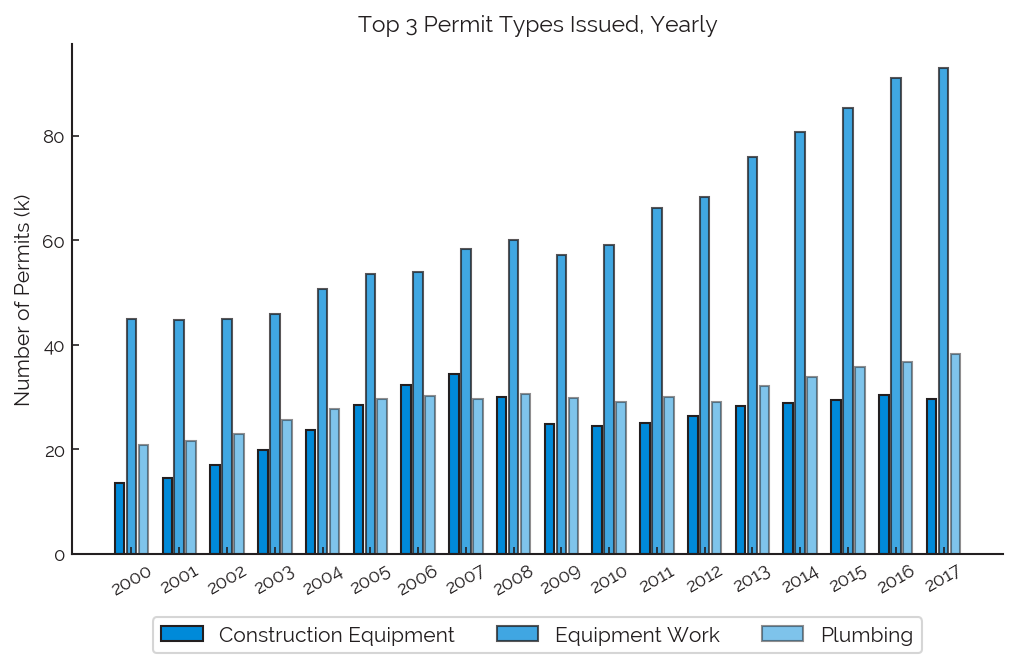

In [20]:
x1 = np.linspace(0,17,(2017-2000)+1)*4
x2 = np.linspace(0,17,(2017-2000)+1)*4+1
x3 = np.linspace(0,17,(2017-2000)+1)*4+2
x4 = np.linspace(0,17,(2017-2000)+1)*4+3

x = [x1,x2,x3,x4]

# plotting
fig, ax = plt.subplots()

for i,c in enumerate(top_3_types.columns):
    plt.bar(x= x[i],
            height=top_3_types[c],
            width = 0.8, 
            color=nt_blue,
            edgecolor = nt_black,
            label = c,
            alpha = 1-0.25*i)
# legend
l = plt.legend(loc='center left', 
           bbox_to_anchor=(.075, -0.16),
           fancybox=True,
           shadow=False, 
           ncol=3)

#label
plt.xticks(ticks=x2, labels=top_3_types.index,rotation=30)
lab = plt.ylabel("Number of Permits (k)")
lab = plt.xlabel(None)

plt.title('Top 3 Permit Types Issued, Yearly')

savefig("permit_types.png", fig, bottom=.2)

** Note:** 
- This chart does not reflects permit issued by DOB NOW. 
- The analysis on permit issued by DOB Now is at dob_now.ipynb 
- DOB NOW and DOB has different sets of types. If we want to agg DOB NOW to DOB permits, we might need to match the types by ourself. 
